# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [2]:
rhythm_period_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_pval.csv")
rhythm_period_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_pval.csv")
rhythm_period_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_qval.csv")
rhythm_period_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_qval.csv")

sum_pval = rhythm_period_mass_spec_pval+rhythm_period_rna_seq_pval
sum_qval = rhythm_period_mass_spec_qval+rhythm_period_rna_seq_qval

# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [3]:
rhythm_period_pval = pd.DataFrame({'Period': rhythm_period_mass_spec_pval["Period"],
                                   'nb_prots_ctrl': sum_pval["nb_prots_ctrl"],
                                   'nb_prots_nlrp3':sum_pval["nb_prots_nlrp3"]})
print(rhythm_period_pval.sort_values(by ="nb_prots_ctrl"))

    Period  nb_prots_ctrl  nb_prots_nlrp3
21    24.5           8208            3364
20    24.4           8220            3362
19    24.3           8229            3361
18    24.2           8232            3357
17    24.1           8235            3355
16    24.0           8249            3346
15    23.9           8252            3342
14    23.8           8253            3328
13    23.7           8264            3320
12    23.6           8271            3312
11    23.5           8286            3307
10    21.5           8474            3140
9     21.4           8491            3128
8     21.3           8498            3119
7     21.2           8508            3110
6     21.1           8522            3097
5     21.0           8527            3083
4     20.9           8538            3062
3     20.8           8548            3048
2     20.7           8556            3037
1     20.6           8574            3021
0     20.5           8581            3011


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

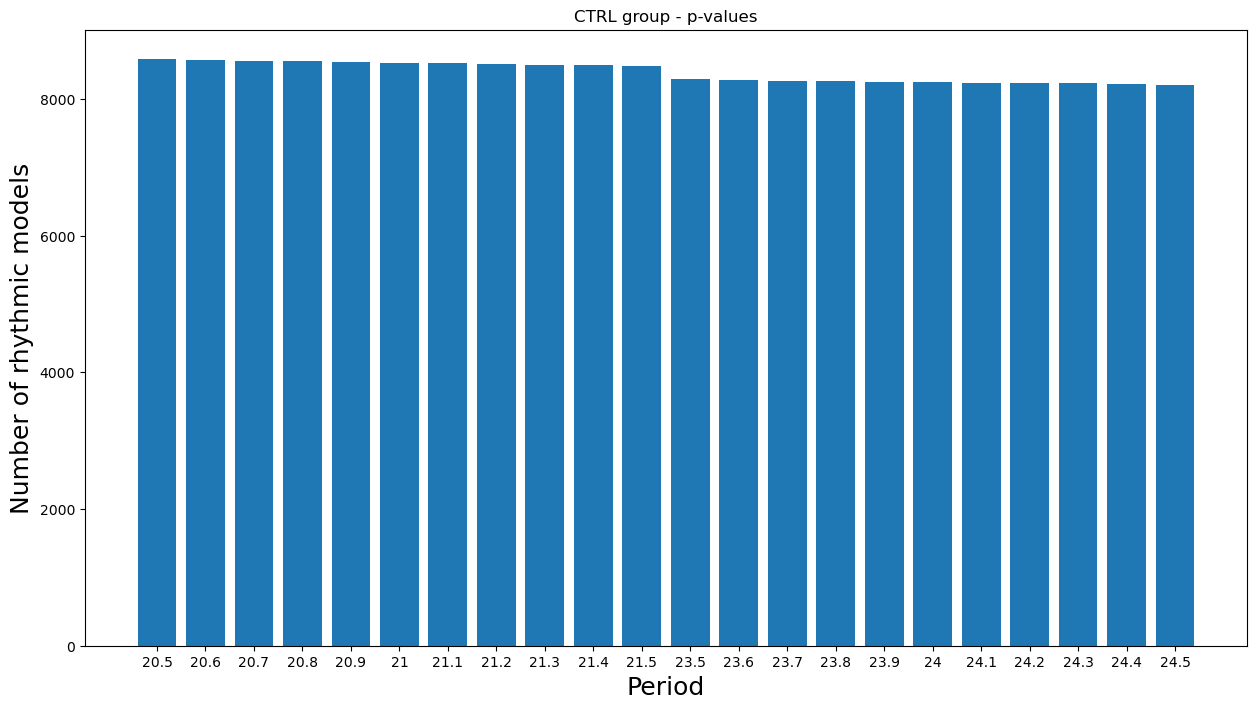

In [4]:
plt.figure(1)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_period_pval["nb_prots_ctrl"]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

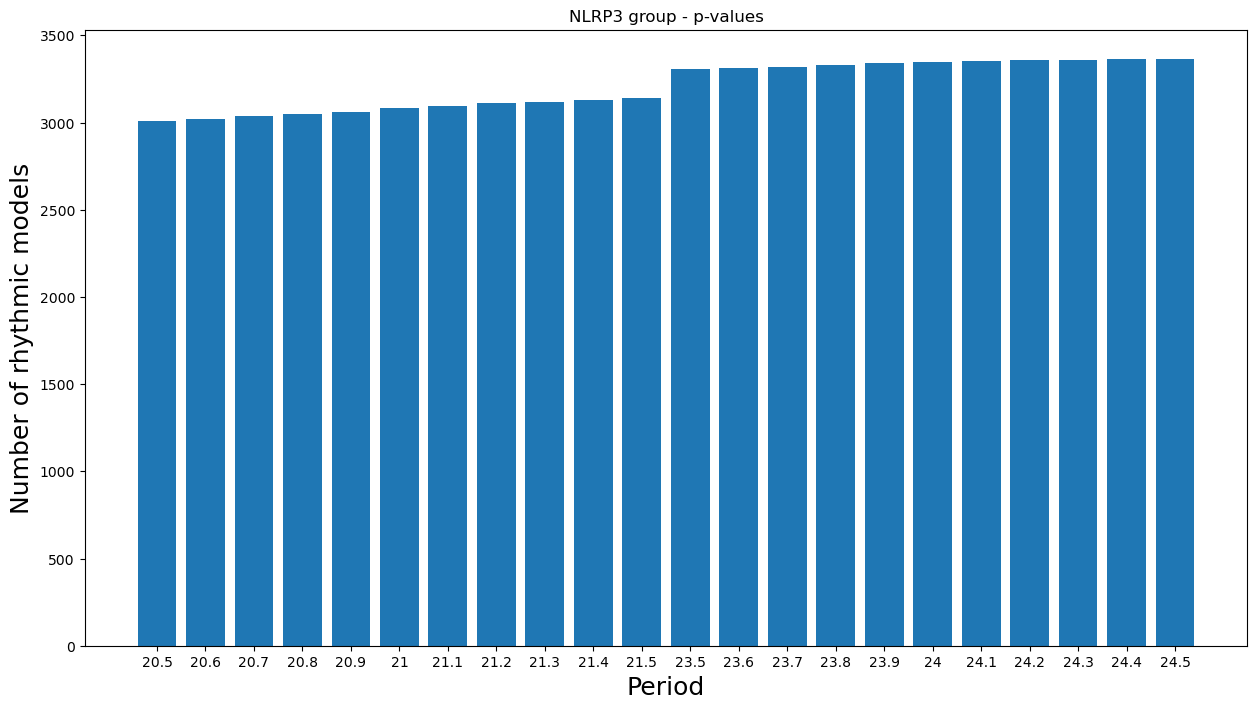

In [5]:
plt.figure(2)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_period_pval["nb_prots_nlrp3"]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [6]:
rhythm_period_qval = pd.DataFrame({'Period': rhythm_period_mass_spec_qval["Period"],
                                   'nb_prots_ctrl': sum_qval["nb_prots_ctrl"],
                                   'nb_prots_nlrp3':sum_qval["nb_prots_nlrp3"]})
print(rhythm_period_qval)

    Period  nb_prots_ctrl  nb_prots_nlrp3
0     20.5           7795            2837
1     20.6           7797            2837
2     20.7           7799            2839
3     20.8           7799            2840
4     20.9           7801            2842
5     21.0           7802            2843
6     21.1           7802            2843
7     21.2           7802            2843
8     21.3           7802            2843
10    21.5           7803            2844
9     21.4           7803            2844
20    24.4           7836            2871
21    24.5           7836            2871
11    23.5           7837            2870
12    23.6           7837            2870
13    23.7           7837            2870
14    23.8           7837            2871
15    23.9           7837            2872
16    24.0           7837            2872
17    24.1           7837            2871
19    24.3           7837            2871
18    24.2           7838            2871


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

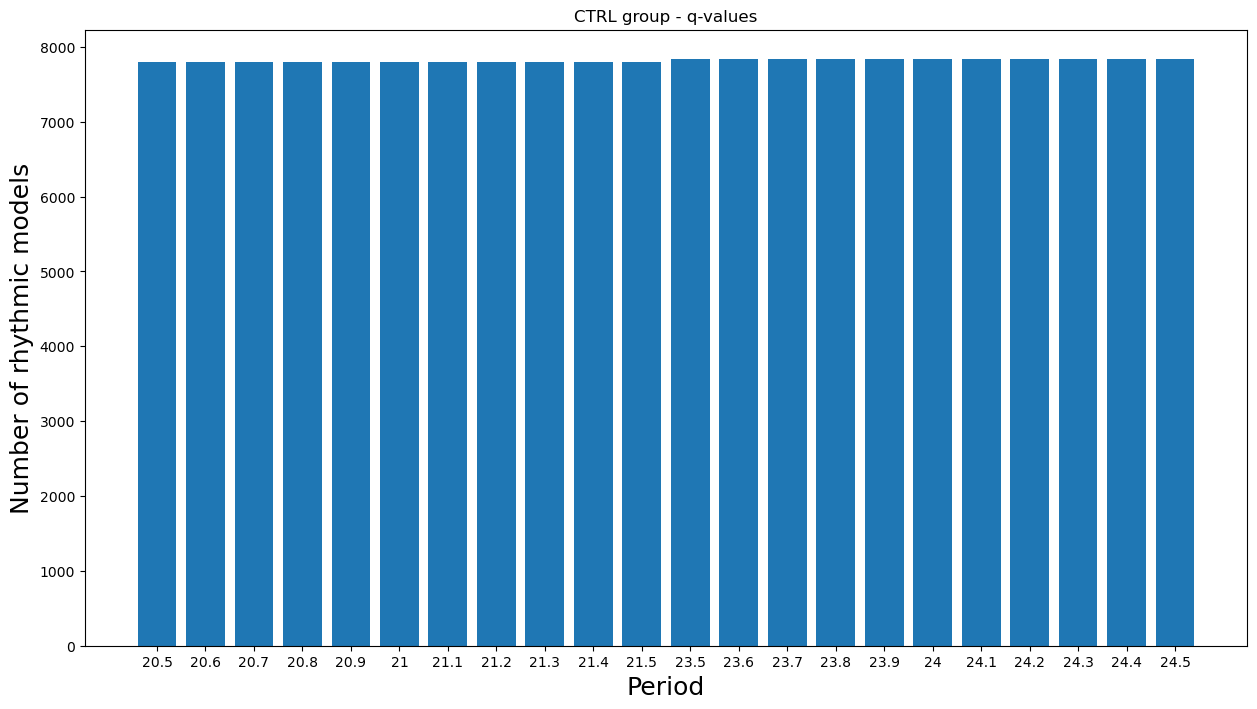

In [7]:
plt.figure(1)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_period_qval['nb_prots_ctrl']
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

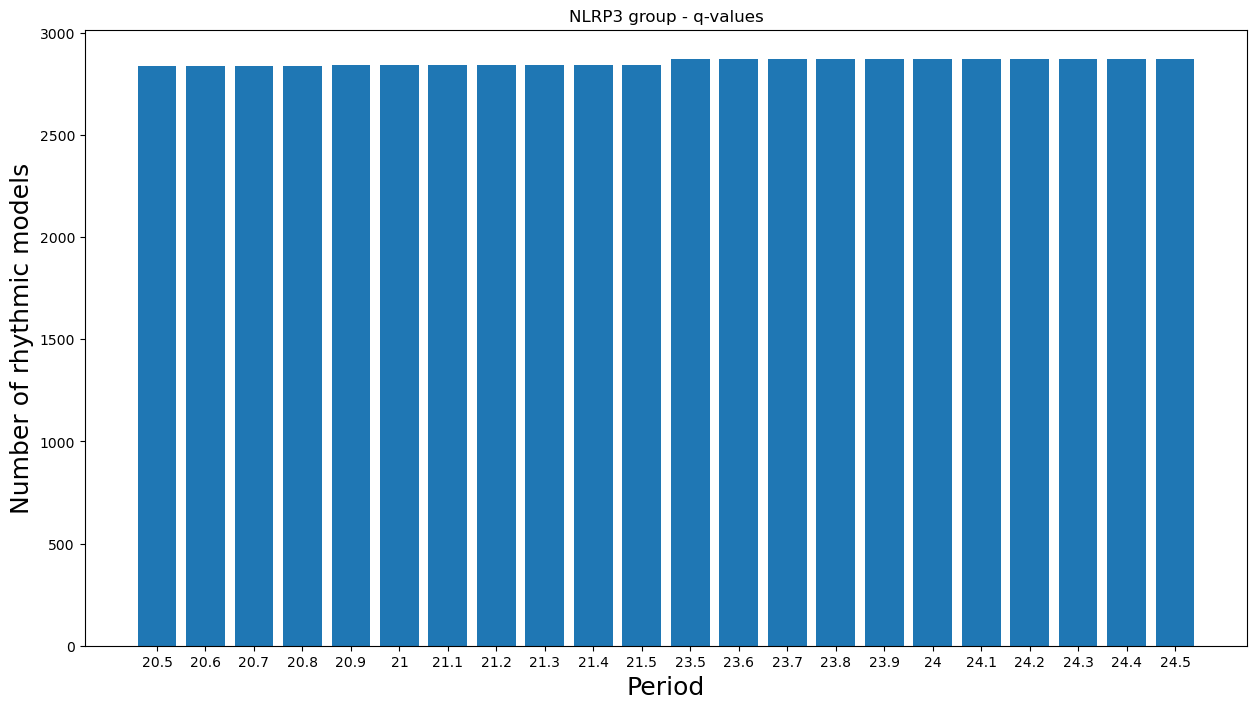

In [8]:
plt.figure(2)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_period_qval['nb_prots_nlrp3']
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_nlrp3_qval.png', dpi = 300)
